In [35]:
import pandas as pd
import os
import re
import sys
import pdb #for debugging
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.metrics import auc
import pickle
import holoviews as hv
import numpy as np
import xarray as xr
import random

%load_ext autoreload
%autoreload 2


# ideally loop through multiple directories, load variables into single object per animal,
# and then have core functions to loop the objects through, with a plotter that
# pulls the outputs together 


day0 = "C://miniscopeData/5546/2022_12_15/13_56_20_record/12152022_cohabitation_5546"
day1 = "C://miniscopeData/5546/2022_12_16/14_36_12/121622_cohousing_5546"
day2 = "C://miniscopeData/5546/2022_12_17/12_48_22"
partner="Left"
novel="Right"
runPartner1OrNovel0 = 0

day14 = "C://miniscopeData/5546/2023_01_01/13_17_27/01012023_PPTnodrug"
partnerDay14="Right"
novelDay14="Left"


mainDir = day0
mainDirName = 'day0'

loadDir = os.path.join(mainDir + '/alignerOutput')


generalOutDir = "C://miniscopeData/5546"
writeOutDir = os.path.join(generalOutDir + '/analysesOutput')
isExist = os.path.exists(writeOutDir)
if not isExist:
    os.makedirs(writeOutDir)



with open(os.path.join(loadDir + '/minianOut.pkl'), 'rb') as f:
    cellsKept, cellsKeptSpikes, cv,boris1 = pickle.load(f)
    
#cellsKept, cellsKeptSpikes, cv, boris1


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
#scratch cell, to look at downsampling of Minian, to make sure indices are appropriate
#temporal downsampling by 2 on Minian, so this should also be 2
#also transposes for corr matrix and PCA cells

columnNames = cellsKept.columns
numMinianFrames = max(columnNames)
numMinianDownsample = cellsKept.shape[1]

downsampleFactor = numMinianFrames / numMinianDownsample
print(downsampleFactor)

dsFactorUsed = 2

#print(numMinianFrames)

cellsKept.shape[0]
cellsTransposed = cellsKept.transpose()


#print(cellsKept.shape[1])
#cellsKept.iloc[(cellsKept['frame']-32).abs().argsort()[:1]]

1.9999626963106651


In [17]:
cellsKept

frame,0,2,4,6,8,10,12,14,16,18,...,107208,107210,107212,107214,107216,107218,107220,107222,107224,107226
unit_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#CORR MATRIX ACROSS SESSION

import seaborn as sns 
#print(cellsTransposed)
matrix = cellsTransposed.corr()
mask_ut = np.triu(np.ones(matrix.shape)).astype(bool)
fig = plt.figure()
hmap = sns.heatmap(matrix,mask=mask_ut,vmin=-1,vmax=1,cmap="Spectral")

fileName = mainDirName + 'overallCorrMatrix.png'
saveFolder = os.path.join(writeOutDir,'corrMatrix/')

isExist = os.path.exists(saveFolder)
if not isExist:
    os.makedirs(saveFolder)
    
saveName = saveFolder + fileName
fig.savefig(saveName)

#print(matrix)
#plt.matshow(matrix)
#plt.show()

In [37]:
def z_score(X):
    # X: ndarray, shape (n_features, n_samples)
    ss = StandardScaler(with_mean=True, with_std=True)
    Xz = ss.fit_transform(X.T).T
    return Xz

cellsKept = z_score(cellsKept)

print(cellsKept.ndim)

2


[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [99.0%] explained variance using the [41] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [39] that covers the [99.00%] explained variance.
[pca] >The PCA reduction is performed on the [41] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[39]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


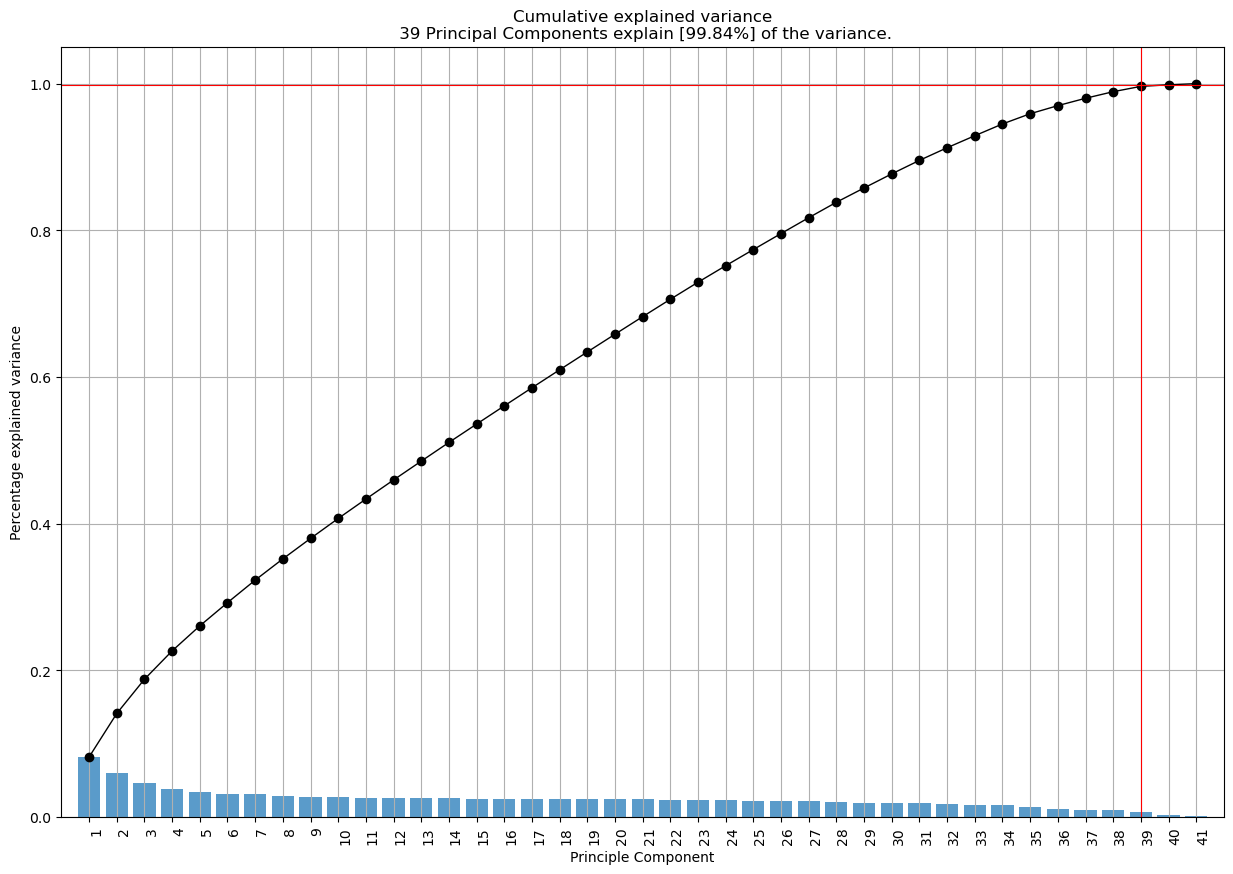

<Figure size 640x480 with 0 Axes>

In [38]:
#PCA ACROSS SESSION

#pip install pca

from pca import pca
import numpy as np
from sklearn.preprocessing import StandardScaler
  
    
def center(X):
    # X: ndarray, shape (n_features, n_samples)
    ss = StandardScaler(with_mean=True, with_std=False)
    Xc = ss.fit_transform(X.T).T
    return Xc


#cellsKeptCentered = center(cellsTransposed)
#cellsKeptCenteredTransposed = cellsKeptCentered.transpose()



model = pca(n_components=0.99, normalize=True)
results = model.fit_transform(cellsTransposed)
fig,ax = model.plot()

# Make scatterplot
#model.scatter()

# Gradient over the samples. High dense areas will be more colourful.
#model.scatter(gradient='#FFFFFF')

# Include the outlier detection
#model.scatter(SPE=True)

# Include the outlier detection
#model.scatter(hotellingt2=True)

# Look at different PCs: 1st PC=1  vs PC=3
#model.scatter(PC=[0, 2])

#fileName = mainDirName + 'overallPCA.png'
#saveFolder = os.path.join(writeOutDir,'PCA/')

#isExist = os.path.exists(saveFolder)
#if not isExist:
#    os.makedirs(saveFolder)
    
#saveName = saveFolder + fileName
#fig.savefig(saveName)

In [ ]:
def runPCA(matrixIn,directory):
    model = pca(n_components=0.95)
    results = model.fit_transform(matrixIn)
    fig,ax = model.plot()
    fig.savefig(directory)


In [291]:
boris1.Behavior
behaviorUniques = list(set([car for car in boris1.Behavior]))
behaviorUniques





## optional cell for warping behavior and neural data to accomodate equal event totals

# modify boris1. 





['grooming',
 'huddle',
 'noncontact investigation',
 'lunge or bite',
 'rearing',
 'food (eating',
 'contact investigation',
 'boxing']

In [358]:
#pulling out events and corresponding data 

behaviorOfInterestCleversys = 'Social Approach' #cleversys-defined social contact
#behaviorOfInterestCleversys = '1 to 2' #cleversys-defined social approach 1 to 2

behaviorOfInterestBoris = 'contact investigation' #boris-defined contact investigation
#behaviorOfInterestBoris = '' #boris-defined contact investigation


Boris1OrCleversys0 = 1
plotCells1OrSpikes0 = 0

if plotCells1OrSpikes0 == 1:
    dataUsed = cellsKept
else:
    dataUsed = cellsKeptSpikes


socialCv = cv[cv.EventType.str.contains(behaviorOfInterestCleversys)]
#socialCv = socialCv[(socialCv.LengthinSec > 1)] #limit to >1sec bouts
socialCv = socialCv.tail(-1)
#print(socialCv)

upsampleNovel = 0

boris1.rename(columns={'Behavioral category': 'BehavioralCategory'},inplace=True)
socialCvBoris = boris1[boris1.Behavior.str.contains(behaviorOfInterestBoris)]
socialCvBoris = socialCvBoris[socialCvBoris.Behavior.str.contains(behaviorOfInterestBoris)]
#socialCvBoris = socialCvBoris[socialCvBoris.BehavioralCategory.str.contains('Affiliative')]


#socialCvBoris = socialCvBoris[(socialCvBoris['Duration (s)'] > 1)]
if mainDir == day2:
    socialCvBorisNovel = socialCvBoris[socialCvBoris.Subject.str.contains(novel)]
    socialCvBorisPartner = socialCvBoris[socialCvBoris.Subject.str.contains(partner)]
    if runPartner1OrNovel0==1:
        socialCvBoris = socialCvBorisPartner
    elif runPartner1OrNovel0==0:
        socialCvBoris = socialCvBorisNovel
        
    upsampleNovel = 1 
    #socialCvBoris = socialCvBoris[socialCvBoris.Behavior.str.contains('noncontact')]
elif mainDir == day14:
    socialCvBoris = socialCvBoris[socialCvBoris.Subject.str.contains(novel)]
socialCvBoris = socialCvBoris.tail(-1)
if Boris1OrCleversys0==1:
    socialCv = socialCvBoris
    behaviorOfInterest = behaviorOfInterestBoris

numBeforeEvent = 20
numAfterEvent = 30
numTotal = numBeforeEvent + numAfterEvent
socialContactC = np.zeros([dataUsed.shape[0],numTotal,socialCv.shape[0]])
print(socialContactC.shape)


for ev in range(socialCv.shape[0]):
    if Boris1OrCleversys0 == 0:
        scopeFrameStart = socialCv.iloc[ev,9]
    else: 
        scopeFrameStart = socialCv.iloc[ev,18]
        
    minianFrameStart = scopeFrameStart/dsFactorUsed
    minianFrameStart = round(minianFrameStart)
    if Boris1OrCleversys0 == 0:
        scopeFrameEnd = socialCv.iloc[ev,10]
    else:
        scopeFrameEnd = socialCv.iloc[ev,19]
    minianFrameEnd = scopeFrameEnd/dsFactorUsed
    minianFrameEnd = round(minianFrameEnd)
    #try: #to account for events happening too close to end
    socialContactC[:,0:numBeforeEvent-1,ev] = dataUsed.iloc[:,minianFrameStart-numBeforeEvent:minianFrameStart-1]
    socialContactC[:,numBeforeEvent-1:numTotal,ev] = dataUsed.iloc[:,minianFrameStart:minianFrameStart+numAfterEvent+1] 
    #except:
        #pass
    
    
#socialContactC = np.nanmean(socialContactC,axis=2) #nanmean across bouts
#print(socialCvBoris)
#socialCvBoris.sum(' Duration (s)')



total = socialCvBoris['Duration (s)'].sum()
print(total)

#socialCvBoris


(75, 50, 50)
284.058


In [327]:
import Assemblies_MEK
dataUsedDf = dataUsed.to_numpy()
np.shape(dataUsedDf)

(61, 52500)

14


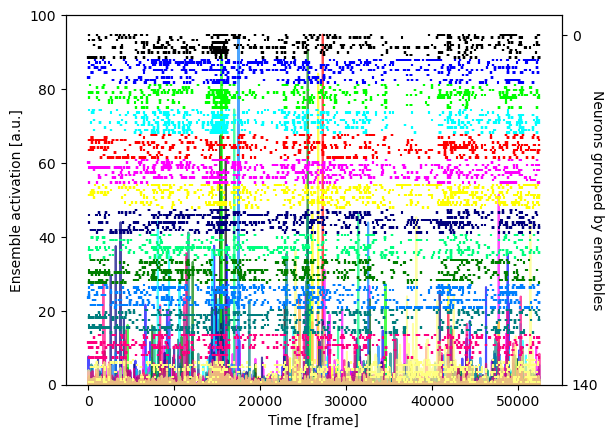

In [328]:
import importlib
importlib.reload(Assemblies_MEK)
assembly_dict, fig, axs = Assemblies_MEK.find_assemblies(dataUsedDf,method='ica',nullhyp='mp',n_shuffles=1000,percentile=99,tracywidow=False,
                              compute_activity=True, use_bool=False, plot=True)
#assembly_dict has patterns, significance, z_data, orig_data, and activations

   
fileName = mainDirName + 'assemblies_spikes.png'

saveFolder = os.path.join(writeOutDir,'assemblies/')

print(len(assembly_dict['activations']))

isExist = os.path.exists(saveFolder)
if not isExist:
    os.makedirs(saveFolder)
    
saveName = saveFolder + fileName

#fig.savefig(saveName)

(14, 52500)
67.42252295608169


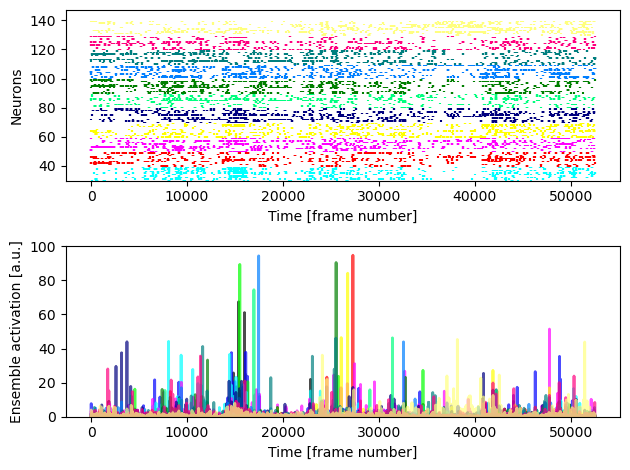

In [329]:
patterns = assembly_dict['patterns']
activations = assembly_dict['activations']
sorted_spiking = assembly_dict['sorted_spiking']
sorted_colors = assembly_dict['sorted_colors']

print(activations.shape)


fig,axs = Assemblies_MEK.plot_assemblies_select(activations, sorted_spiking, colors=sorted_colors)


fileName = mainDirName + 'assemblies_spikes_example.png'

saveFolder = os.path.join(writeOutDir,'assemblies/')

isExist = os.path.exists(saveFolder)
if not isExist:
    os.makedirs(saveFolder)
    
saveName = saveFolder + fileName


#with open(os.path.join(saveFolder + '\_5546_day0.pkl'), 'wb') as f:
    #pickle.dump([assembly_dict], f)

In [ ]:
# 1) try warping novel events using nearest neighbor to equalize the num of frames for each event type
# 2) using total novel time, subsample partner time & remove other frames

import statistics 

totalSession = boris1['Duration (s)'].sum()
#print(totalSession)

totalPartner = socialCvBorisPartner['Duration (s)'].sum()
totalNovel = socialCvBorisNovel['Duration (s)'].sum()
novelTimeToAddTotal = (totalPartner-totalNovel)
#print(middlePoint)

# divide amount of necessary added time by # events to add that time to
#novelTimeToAdd = middlePoint - totalNovel
#partnerTimeToSubtract = totalPartner - middlePoint

#print(len(socialCvBorisPartner))
#print(len(socialCvBorisNovel))
novelTimeToAdd = novelTimeToAddTotal / len(socialCvBorisNovel)
#partnerTimeToSubtract = partnerTimeToSubtract / len(socialCvBorisPartner)
#print(novelTimeToAdd)
#print(partnerTimeToSubtract)


# find avg conversion between behavior frame #s and minian frame #s. use that 
differenceFrameNums = socialCvBorisNovel.iloc[:,17] - socialCvBorisNovel.iloc[:,16]
differenceScopeNums = socialCvBorisNovel.iloc[:,19] - socialCvBorisNovel.iloc[:,18]
avgConversion = np.mean(differenceScopeNums / differenceFrameNums)


#bug - newMinianLength changes with every event, so cant be set in stone here
#but if I write it back into dataUsed, then the indices for that change..
newCell = np.zeros((len(tempData),dataUsed.shape[1]+(novelTimeToAddTotal*avgConversion),socialCvBorisNovel.shape[0]))
                   
#print(socialCvBorisNovel.shape[0])
#print(newMinianLength)

for ev in [0]:#range(socialCvBorisNovel.shape[0]):

    # pull out cam and scope frame indices
    camFrameStart = socialCvBorisNovel.iloc[ev,16]
    camFrameStop = socialCvBorisNovel.iloc[ev,17]
    scopeFrameStart = socialCvBorisNovel.iloc[ev,18]
    scopeFrameEnd = socialCvBorisNovel.iloc[ev,19]

    #display(socialCvBorisNovel.iloc[0:5,:])

    #convert seconds into frames to add
    framesToAdd = novelTimeToAdd * 50
    # add new behavior frames. these will become 1s downstream
    newEnd = (round(camFrameStop+framesToAdd))
    socialCvBorisNovel.iloc[ev,17] = newEnd
        # adjust the rest of the frames to account for this change
    socialCvBorisNovel.iloc[ev+1:-1,16] = socialCvBorisNovel.iloc[ev+1:-1,16] + int(framesToAdd)
    socialCvBorisNovel.iloc[ev+1:-1,17] = socialCvBorisNovel.iloc[ev+1:-1,17] + int(framesToAdd)

    # now go into neural data and interpolate to warp equivalent amount of neural data

    # find new minianFrameStart and minianFrameEnd
    # go into dataUsed and interpolate it, making dataUsed larger
    scopeFramesToAdd = int(framesToAdd * avgConversion)
    newScopeFrameEnd = scopeFrameEnd + scopeFramesToAdd
    socialCvBorisNovel.iloc[ev,19] = newScopeFrameEnd

    # adjust the rest of the frames to account for this change
    # when indexed in the future, it will ultimately point to a modified dataUsed that has new frames
    socialCvBorisNovel.iloc[ev+1:-1,18] = socialCvBorisNovel.iloc[ev+1:-1,18] + int(scopeFramesToAdd)
    socialCvBorisNovel.iloc[ev+1:-1,19] = socialCvBorisNovel.iloc[ev+1:-1,19] + int(scopeFramesToAdd)

    # get the typical minian frame indices
    minianFrameStart = scopeFrameStart/dsFactorUsed
    minianFrameStart = round(minianFrameStart)
    minianFrameEnd = scopeFrameEnd/dsFactorUsed
    minianFrameEnd = round(minianFrameEnd)


    # get new minian frame end index, and new length of data
    newMinianFrameEnd = round(newScopeFrameEnd / dsFactorUsed)
    newMinianLength = newMinianFrameEnd - minianFrameStart
    existingMinianLength = minianFrameEnd - minianFrameStart


    print(newMinianLength)
    print(existingMinianLength)

    # pull out the existing data
    tempData = dataUsed.iloc[:,minianFrameStart:minianFrameEnd]


    #Initialize new numpy matrix for cells with new length of data
    newCell = np.zeros((len(tempData),newMinianLength))

    # loop through cells
    for cell in [0]:#[0]:#range(len(dataUsed)):
        #print(cell)
        tempDataCell = tempData.iloc[cell,:] 


        # to determine how many times to repeat Minian values 
        multiplyFactor = (round(newMinianLength/existingMinianLength))
        #print(multiplyFactor)

    
        tempDataCell = tempDataCell.to_numpy()
        tempDataCell = np.repeat(tempDataCell,multiplyFactor+1,axis=0)

        #print(newMinianLength)

        #now, take out the # of frames that we overshot by
        #shitty way to do it
        change = (len(tempDataCell) - newMinianLength)
        randDelete = random.sample(range(0,len(tempDataCell)),change)
        tempDataCell = np.delete(tempDataCell,randDelete)
        #print(len(tempDataCell))

        # insert into array
        newCell[cell,:] = tempDataCell

        #tempDataCell  = pd.DataFrame(tempDataCell)
        #tempData.iloc[cell,:] = tempDataCell
        #dataWriteIn = newCell[cell,0:existingMinianLength]
        
        
        #len(dataWriteIn.columns)
        
        #dataWriteIn = newCell.reshape((existingMinianLength,))
        #dataWriteIn = pd.DataFrame(newCell[cell,0:existingMinianLength])
        #dataWriteIn = pd.DataFrame(dataWriteIn)
        #dataWriteIn = dataWriteIn.reshape((existingMinianLength,))
    dataWriteIn = newCell[:,0:existingMinianLength]
    print(dataWriteIn.shape)
    dataUsed.iloc[:,minianFrameStart:minianFrameEnd] = dataWriteIn
    
    print(dataUsed.shape)
        
    # now for anything beyond existing MinianLength, need to expand the # of columns
    numRemaining = newMinianLength - existingMinianLength
    remainingData = newCell[:,-numRemaining:]
    numSamples = (remainingData.shape[0])
    #print(minianFrameEnd+1)
    #print(minianFrameEnd+1+numSamples)
    #print([minianFrameEnd+1:minianFrameEnd+1+numSamples])
    #dataUsed.insert(minianFrameEnd+1:minianFrameEnd+1+remainingData.shape,[],remainingData)
    #dataUsed.insert[cell,minianFrameEnd+1,'columns'] = remainingData    
    #display(pd.DataFrame(remainingData))
    
    
    
    print(remainingData.shape)
    print(dataUsed.shape)
    
    
    remainingData = pd.DataFrame(remainingData)
    unitIdNames = (dataUsed.index)
    remainingData.index = unitIdNames
    
    dataUsed = dataUsed.join(remainingData,rsuffix='_')





In [ ]:
#display(dataUsed)
print(remainingData.shape)
print(dataWriteIn.shape)
print(unitIdNames)

#dataUsed2 = dataUsed.join(remainingData,rsuffix='_')
#print(dataUsed2.shape)
display(dataUsed)

## BEHAVIOR SPECIFIC PCA
socialContactC_acrossCells = np.nanmean(socialContactC,axis=2) #nanmean across bouts
socialContactC_acrossCells = socialContactC_acrossCells.transpose()
model = pca(n_components=0.95)
results = model.fit_transform(socialContactC_acrossCells)
fig,ax = model.plot()

fileName = mainDirName + 'BehaviorPCA.png'
if mainDir == day2:
    fileName = mainDirName + 'NovelBehaviorPCA.png'
elif mainDir == day14:
    fileName = mainDirName + 'PartnerBehaviorPCA.png'
    

saveFolder = os.path.join(writeOutDir,'PCA/')

isExist = os.path.exists(saveFolder)
if not isExist:
    os.makedirs(saveFolder)
    
saveName = saveFolder + fileName
fig.savefig(saveName)

#fig.savefig(directory)

In [233]:
#function for running AUC shuffles
def auROCshuffle(cellActivity):
    cellActivityZScore = stats.zscore(cellActivity)

    # initialize TPR and FPR for each of the 100 steps
    TPR_cell = [0] * 100
    FPR_cell = [0] * 100

    #max(cellActivityZScore)
    #min(cellActivityZScore)

    # define 100 steps of z-scored DF/F
    steps = np.linspace(min(cellActivityZScore),max(cellActivityZScore),num=100)

    for st in range(len(steps)):
        # iter through steps, calculate metrics, aggregate
        indices = [i for i in range(len(cellActivityZScore)) if cellActivityZScore[i] >= steps[st]]
        indicesBelow = [i for i in range(len(cellActivityZScore)) if cellActivityZScore[i] < steps[st]]
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for ind in range(len(indices)):
            behaviorPresence  = contactBinary[indices[ind]]
            if behaviorPresence==1:
                TP = TP + 1
            if behaviorPresence==0:
                FP = FP + 1
    
        for indBelow in range(len(indicesBelow)):
            behaviorPresence = contactBinary[indicesBelow[indBelow]]
            if behaviorPresence==1:
                FN = FN + 1
            if behaviorPresence==0:
                TN = TN + 1
        #try:
        TPR_cell[st] = TP / (TP + FN)
        #except:
            #sometimes TPR is dividing by 0 b/c at a given threshold, there were no true positives and no false negatives yet
            #TPR_cell[st] = 0
            #print(st)
            #print(ind)
        if doPRC==0:
            FPR_cell[st] = FP / (FP + TN)
        elif doPRC==1:
            FPR_cell[st] = TP / (TP + FP) #actually precision

    # plot AUCs on top of one another and write out AUC
    #plt.plot(FPR_cell,TPR_cell,'b')
    if doPRC==1:
        AUC_shuffles = auc(TPR_cell,FPR_cell)
    elif doPRC==0:
        AUC_shuffles = auc(FPR_cell,TPR_cell)
    
    return AUC_shuffles

In [330]:
print(cellsKept.shape)
print(activations.shape)
cellsKept = pd.DataFrame(activations)

(14, 52500)
(14, 52500)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


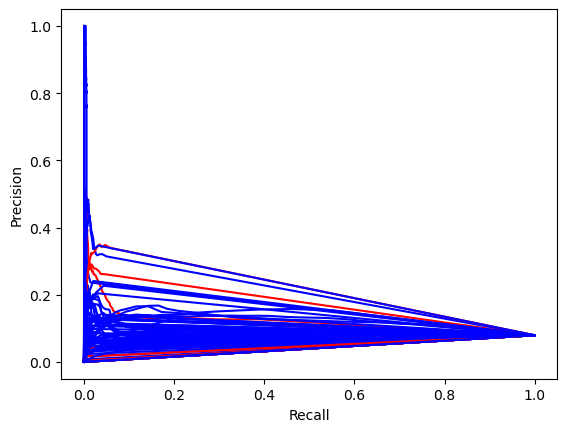

In [359]:
runShuffle = 1
doPRC = 1
import nn_interpolate

#construct binary vector of behavior yes/no
contactBinary = [0] * numMinianDownsample

from collections import deque
from random import randint

# go through behaviors, find the minian frames they align to, and assign those as 1s
for ev in range(socialCv.shape[0]):
    if Boris1OrCleversys0 == 0:
        scopeFrameStart = socialCv.iloc[ev,9] #this is 
    else: 
        scopeFrameStart = socialCv.iloc[ev,18]
        
    minianFrameStart = scopeFrameStart/dsFactorUsed
    minianFrameStart = round(minianFrameStart)
    if Boris1OrCleversys0 == 0:
        scopeFrameEnd = socialCv.iloc[ev,10]
    else:
        scopeFrameEnd = socialCv.iloc[ev,19]
    minianFrameEnd = scopeFrameEnd/dsFactorUsed
    minianFrameEnd = round(minianFrameEnd)
    temp = np.tile(1,minianFrameEnd-minianFrameStart) #vector of 1s
    temp = np.ndarray.tolist(temp)
    contactBinary[minianFrameStart:minianFrameEnd] = temp #insert 1s into the binary vector


#count_1 = contactBinary.count(1)
if doPRC==0:
    fileName = mainDirName + 'auROC.png'
elif doPRC==1:
    fileName = mainDirName + 'PRC.png'


if mainDir == day2:
    if runPartner1OrNovel0==0:
        fileName = mainDirName + 'novel_PRC.png'
    elif runPartner1OrNovel0==1:
        fileName = mainDirName + 'partner_PRC.png' 
elif mainDir == day14:
    fileName = mainDirName + 'novel_PRC.png'
    

saveFolder = os.path.join(writeOutDir,'auROC/')

isExist = os.path.exists(saveFolder)
if not isExist:
    os.makedirs(saveFolder)
    
saveName = saveFolder + fileName



# initialize AUC vector
AUC_cells = [0] * cellsKept.shape[0]

fig = plt.figure()

#if warp==1, I can change cellsKept into a numpy array that includes mods 

# iterate through cells
for cell in range(cellsKept.shape[0]):
    print(cell)
    cellNum = cell
    cellActivity = cellsKept.iloc[cellNum,:]
    cellActivity = cellActivity.tolist()
    #print(cellActivity)
    cellActivityZScore = stats.zscore(cellActivity)

    # initialize TPR and FPR for each of the 100 steps
    TPR_cell = [0] * 100
    FPR_cell = [0] * 100

    #max(cellActivityZScore)
    #min(cellActivityZScore)

    # define 100 steps of z-scored DF/F
    steps = np.linspace(min(cellActivityZScore),max(cellActivityZScore),num=100)

    for st in range(len(steps)):
        # iter through steps, calculate metrics, aggregate
        indices = [i for i in range(len(cellActivityZScore)) if cellActivityZScore[i] >= steps[st]]
        indicesBelow = [i for i in range(len(cellActivityZScore)) if cellActivityZScore[i] < steps[st]]
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for ind in range(len(indices)):
            behaviorPresence  = contactBinary[indices[ind]]
            if behaviorPresence==1:
                TP = TP + 1
            if behaviorPresence==0:
                FP = FP + 1
    
        for indBelow in range(len(indicesBelow)):
            behaviorPresence = contactBinary[indicesBelow[indBelow]]
            if behaviorPresence==1:
                FN = FN + 1
            if behaviorPresence==0:
                TN = TN + 1
                
                
        if doPRC==0:
            FPR_cell[st] = FP / (FP + TN)
        elif doPRC==1:
            FPR_cell[st] = TP / (TP + FP) #actually precision
        
        #try:
        TPR_cell[st] = TP / (TP + FN)
        #except:
            #need to figure out why a few cells are trying to divide by zero 
            #TPR_cell[st] = 0
            #import pdb; pdb.set_trace()
            #print(st)
            #print(ind)
        #print(TPR_cell[st])
        #print(FPR_cell[st])   
 

    # plot AUCs on top of one another and write out AUC
    if doPRC==1:
        AUC_cells[cell] = auc(TPR_cell,FPR_cell)
    elif doPRC==0:
        AUC_cells[cell] = auc(FPR_cell,TPR_cell)
        
        
    #AUC_cells[cell] = auc(FPR_cell,TPR_cell)
    
    if runShuffle==1:    
    
        AUC_shuffleAll = [0] * 100
        items = deque(cellActivity)
        for shuffle in range((100)):
            #print(shuffle)
            items.rotate(randint(0,len(cellActivityZScore)))
            shuffledCellActivity = list(items)
            AUC_shuffleAll[shuffle] = auROCshuffle(shuffledCellActivity)
            #print(AUC_shuffleAll[shuffle])
        shufflesNoZeros = [i for i in AUC_shuffleAll if i!= 0]
        if doPRC==0:
            if AUC_cells[cell] > np.percentile(shufflesNoZeros,97.5):
                plt.plot(FPR_cell,TPR_cell,'r')
            elif AUC_cells[cell] < np.percentile(shufflesNoZeros,2.5):
                plt.plot(FPR_cell,TPR_cell,'r')
            else:
                plt.plot(FPR_cell,TPR_cell,'b')
        elif doPRC==1:
            if AUC_cells[cell] > np.percentile(shufflesNoZeros,97.5):
                plt.plot(TPR_cell,FPR_cell,'r')
            elif AUC_cells[cell] < np.percentile(shufflesNoZeros,2.5):
                plt.plot(TPR_cell,FPR_cell,'r')
            else:
                plt.plot(TPR_cell,FPR_cell,'b')            
            
    elif runShuffle==0:
        
        if doPRC==0:
            plt.plot(FPR_cell,TPR_cell,'b')
        elif doPRC==1:
            plt.plot(TPR_cell,FPR_cell,'b')
        
        
if doPRC==1:
    plt.xlabel("Recall")
    plt.ylabel("Precision")
elif doPRC==0:
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
fig.savefig(saveName)
#need a shuffle procedure
    
#with open(writeOutDir, 'wb') as f:
    #pickle.dump([AUC_cells], f)


    
#temp = np.tile(1,minianFrameEnd-minianFrameStart)
#temp = np.ndarray.tolist(temp)
#temp
#ls = [type(item) for item in temp]
#print(ls)
#np.tile(1,minianFrameEnd-minianFrameStart)

In [335]:
#shufflesNoZeros
AUC_cells[cell]

0

In [ ]:
st=0
# iter through steps, calculate metrics, aggregate
indices = [i for i in range(len(cellActivityZScore)) if cellActivityZScore[i] >= steps[st]]
indicesBelow = [i for i in range(len(cellActivityZScore)) if cellActivityZScore[i] < steps[st]]


TP = 0
FP = 0
TN = 0
FN = 0
        
for ind in range(len(indices)):
    behaviorPresence  = contactBinary[indices[ind]]
    if behaviorPresence==1:
        TP = TP + 1
    if behaviorPresence==0:
        FP = FP + 1
    
for indBelow in range(len(indicesBelow)):
    behaviorPresence = contactBinary[indicesBelow[indBelow]]
    if behaviorPresence==1:
        FN = FN + 1
    if behaviorPresence==0:
        TN = TN + 1
                
                
print(len(indices))
print(TP)
print(FN)

print(len(indicesBelow))

        

In [ ]:
from collections import deque
from random import randint

items=deque(cellActivity)
items.rotate(randint(0,len(cellActivity)))
shuffledCellActivity = list(items)

#print(cellActivity[0:5])

#items = deque(cellActivity)
#shuffleBy = randint(0,len(cellActivity))
#print(shuffleBy)
    
#items.rotate(shuffleBy)

#new = list(items)
#print(new[0:5])


#items.

#cellActivity.append(cellActivity.pop(0))

#print(cellActivity[0:5])

#print(cellActivityShuffled[0:5])

In [ ]:
AUC_shuffleAll = [0] * 100
items = deque(cellActivity)
for shuffle in range((100)):
    items.rotate(randint(0,len(cellActivity)))
    shuffledCellActivity = list(items)
    AUC_shuffleAll[shuffle] = auROCshuffle(shuffledCellActivity)
print(AUC_shuffleAll)
if AUC_cells[cell] > np.percentile(AUC_shuffleAll,97.5):
    #color it red
    elif AUC_cells[cell] < np.percentile(AUC_shuffleAll,2.5):
        # color it red
    else:
        # color it blue

In [ ]:
AUC_cells[cell] > np.percentile(AUC_shuffleAll,95)

In [ ]:
AUC_cells

In [ ]:
#print('computed AUC: {}'.format(auc(FPR_cell,TPR_cell)))

with open(os.path.join(writeOutDir + '\AUC_N.pkl'), 'wb') as f:
    pickle.dump([AUC_cells], f)
    
indexMaxAUC = [i for i in range(len(AUC_cells)) if AUC_cells[i] == max(AUC_cells)]
indexMaxAUC

ev


In [ ]:
openDir0 = os.path.join(mainDir0 + '/analysesOutput/AUC.pkl')
openDir1 = os.path.join(mainDir1 + '/analysesOutput/AUC.pkl')
openDir2 = os.path.join(mainDir2 + '/analysesOutput/AUC.pkl')

with open(openDir0, 'rb') as f:
    AUC_0 = pickle.load(f)
with open(openDir1, 'rb') as f:
    AUC_1 = pickle.load(f)    
with open(openDir2, 'rb') as f:
    AUC_2 = pickle.load(f)
    

In [ ]:
AUC_1

In [ ]:
stats.ttest_ind(AUC_0,AUC_1,axis=1)

#scipy.mean(AUC_0) - scipy.mean(AUC_1)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


# initialize AUC vector
AUC_cells = [0] * cellsKept.shape[0]

# iterate through cells
for cell in range(cellsKept.shape[0]):
    cellNum = cell
    cellActivity = cellsKept.iloc[cellNum,:]
    cellActivity = cellActivity.tolist()
    cellActivityZScore = stats.zscore(cellActivity)
    
    fpr, tpr, thresholds = roc_curve(contactBinary, cellActivityZScore)
    
    


In [ ]:
#plotting by cell

figTotal,axTotal = plt.subplots(15,3,figsize=(10,10))
for cell in range(socialContactC.shape[0]):
    cellActivity = socialContactC[cell,:,:]
    socialContactMeans = np.nanmean(cellActivity,axis=1)
    socialContactSte = np.nanstd(cellActivity,axis=1)
    socialContactSte = socialContactSte / np.sqrt(cellActivity.shape[1])

    xval = np.arange(numTotal)
    plt.subplot(15,3,cell+1)
    plt.errorbar(xval,socialContactMeans,socialContactSte,linestyle='None')
    #plt.xlabel('Time relative to social contact (sec)')
    #plt.ylabel('DF/F')
    plt.xticks(np.arange(0,60,step=20),['-1.5', '0', '1.5', '3'])
    #ax.set_ylim(-0.05, 0.05)

In [ ]:
#plotting across cells
socialContactC_acrossCells = np.nanmean(socialContactC,axis=2) #nanmean across bouts

socialContactMeans = np.nanmedian(socialContactC_acrossCells,axis=0) #across cells
socialContactSte = np.nanstd(socialContactC_acrossCells,axis=0)
socialContactSte = socialContactSte / np.sqrt(socialContactC_acrossCells.shape[0])


xval = np.arange(numTotal)
plt.subplot()
plt.errorbar(xval,socialContactMeans,socialContactSte,linestyle='None')
plt.xlabel('Time relative to social contact (sec)')
plt.ylabel('DF/F')
plt.xticks(np.arange(0,60,step=20),['-1.5', '0', '1.5', '3'])

In [ ]:
cellNum = 35
cellActivity = socialContactC[cellNum,:,:]
# plot all 83 traces on one plot

xval = np.arange(numTotal)

np.shape(cellActivity)
for bout in range(cellActivity.shape[1]):
    plt.plot(xval,cellActivity[:,bout])
    
    plt.xticks(np.arange(0,60,step=20),['-1.5', '0', '1.5', '3'])
    plt.xlabel('Time relative to social approach (sec)')
    plt.ylabel('DF/F')